In [1]:
import pandas as pd
ds = pd.read_csv('data.csv')

In [2]:
ds.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
ds = ds.drop(['Loan_ID'], axis=1)
ds.head()

ds.replace({'Married': {'No': 0, 'Yes': 1}, 'Gender': {'Male': 1, 'Female': 0}, 'Self_Employed': {'No': 0, 'Yes': 1}, 'Property_Area': {'Rural': 0, 'Semiurban': 1, 'Urban': 2}, 'Education': {'Graduate': 1, 'Not Graduate': 0}, 'Loan_Status': {'N': 0, 'Y': 1}}, inplace=True)
ds.replace(to_replace='3+', value=4, inplace=True)

ds.dropna(inplace=True)

In [4]:
x_data = ds.iloc[:,:-1]
y_data = ds.iloc[:,-1]

In [5]:
x_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,0
2,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,2
3,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,2
4,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,2
5,1.0,1.0,2,1,1.0,5417,4196.0,267.0,360.0,1.0,2


In [6]:
y_data.head()

1    0
2    1
3    1
4    1
5    1
Name: Loan_Status, dtype: int64

In [7]:
from sklearn.preprocessing import StandardScaler

scaler_StandardScaler = StandardScaler()
X_scaled_StandardScaler = scaler_StandardScaler.fit_transform(x_data)



In [8]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x_data,y_data,test_size=0.2,random_state=1) 

In [9]:
x_train_selected_StandardScaler = scaler_StandardScaler.fit_transform(x_train)
x_test_selected_StandardScaler = scaler_StandardScaler.transform(x_test)

In [10]:
from sklearn.naive_bayes import GaussianNB

GaussianNB_classifier = GaussianNB()

GaussianNB_classifier.fit(x_train_selected_StandardScaler, y_train)

GaussianNB()

In [11]:
y_pred_StandardScaler = GaussianNB_classifier.predict(x_test_selected_StandardScaler)

In [12]:
from sklearn.metrics import accuracy_score

accuracy_StandardScaler = accuracy_score(y_test, y_pred_StandardScaler) * 100

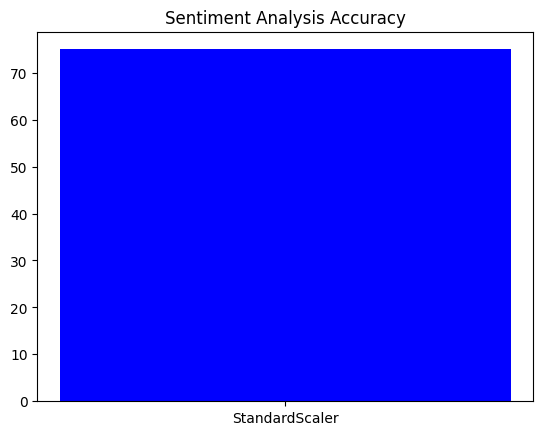

accuracy StandardScaler:75.0 %


In [13]:
import matplotlib.pyplot as plt

plt.bar(['StandardScaler'], [accuracy_StandardScaler], color=['blue'])
plt.title('Sentiment Analysis Accuracy')
plt.show()

print(f'accuracy StandardScaler:{accuracy_StandardScaler} %')

In [14]:
from sklearn.svm import SVC

svm_classifier = SVC()

svm_classifier.fit(x_train_selected_StandardScaler, y_train)

SVC()

In [15]:
y_pred_StandardScaler_s = svm_classifier.predict(x_test_selected_StandardScaler)

In [16]:
from sklearn.metrics import accuracy_score

accuracy_StandardScaler = accuracy_score(y_test, y_pred_StandardScaler_s) * 100

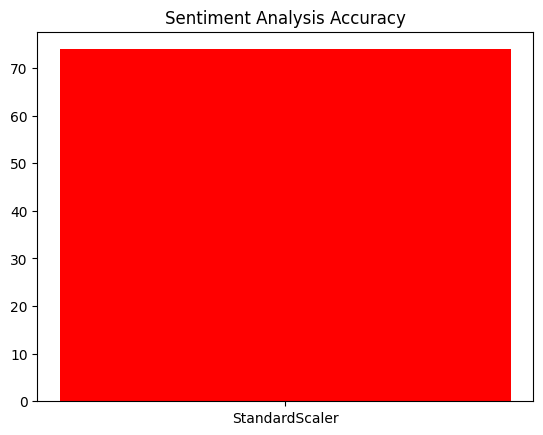

accuracy StandardScaler:73.95833333333334 %


In [17]:
import matplotlib.pyplot as plt

plt.bar(['StandardScaler'], [accuracy_StandardScaler], color=['red'])
plt.title('Sentiment Analysis Accuracy')
plt.show()

print(f'accuracy StandardScaler:{accuracy_StandardScaler} %')

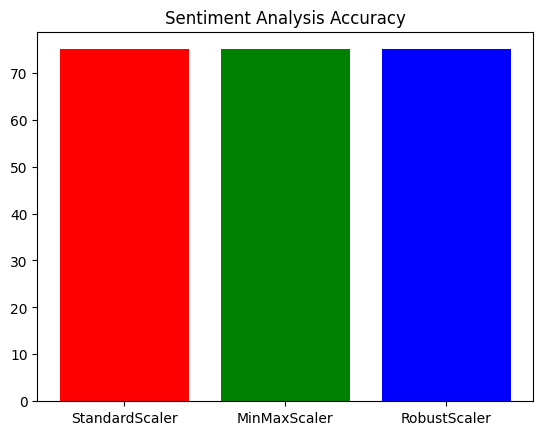

Naive Bayes accuracies: [75.0, 75.0, 75.0]


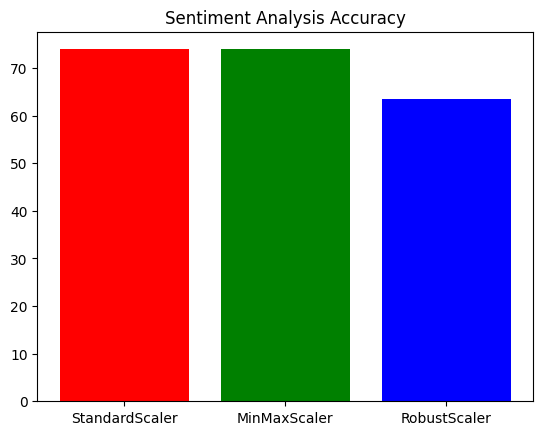

SVM accuracies: [73.95833333333334, 73.95833333333334, 63.541666666666664]


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def load_data(file_path):
    ds = pd.read_csv(file_path)
    ds = ds.drop(['Loan_ID'], axis=1)
    ds.head()

    ds.replace({'Married': {'No': 0, 'Yes': 1}, 'Gender': {'Male': 1, 'Female': 0}, 'Self_Employed': {'No': 0, 'Yes': 1}, 'Property_Area': {'Rural': 0, 'Semiurban': 1, 'Urban': 2}, 'Education': {'Graduate': 1, 'Not Graduate': 0}, 'Loan_Status': {'N': 0, 'Y': 1}}, inplace=True)
    ds.replace(to_replace='3+', value=4, inplace=True)

    ds.dropna(inplace=True)
    x_data = ds.iloc[:,:-1]
    y_data = ds.iloc[:,-1]
    return x_data, y_data

def scale_data(x_data, scaler):
    return scaler.fit_transform(x_data)

def train_and_predict(classifier, x_train, y_train, x_test):
    classifier.fit(x_train, y_train)
    return classifier.predict(x_test)

def calculate_accuracy(y_true, y_pred):
    return accuracy_score(y_true, y_pred) * 100

def plot_accuracy(accuracies):
    labels = ['StandardScaler', 'MinMaxScaler', 'RobustScaler']
    colors = ['red', 'green', 'blue']
    plt.bar(labels, accuracies, color=colors)
    plt.title('Sentiment Analysis Accuracy')
    plt.show()

def main():
    file_path = 'data.csv'
    x_data, y_data = load_data(file_path)

    scalers = [StandardScaler(), MinMaxScaler(), RobustScaler()]
    accuracies_nb = []
    accuracies_svm = []

    for scaler in scalers:
        x_scaled = scale_data(x_data, scaler)
        x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_data, test_size=0.2, random_state=1)

        # Naive Bayes
        nb_classifier = GaussianNB()
        y_pred_nb = train_and_predict(nb_classifier, x_train, y_train, x_test)
        accuracy_nb = calculate_accuracy(y_test, y_pred_nb)
        accuracies_nb.append(accuracy_nb)

        # SVM
        svm_classifier = SVC(kernel='rbf')
        y_pred_svm = train_and_predict(svm_classifier, x_train, y_train, x_test)
        accuracy_svm = calculate_accuracy(y_test, y_pred_svm)
        accuracies_svm.append(accuracy_svm)

    # Plotting accuracies for Naive Bayes
    plot_accuracy(accuracies_nb)
    print(f'Naive Bayes accuracies: {accuracies_nb}')

    # Plotting accuracies for SVM
    plot_accuracy(accuracies_svm)
    print(f'SVM accuracies: {accuracies_svm}')

if __name__ == "__main__":
    main()
